In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data

In [2]:
data=pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [3]:
print(data)

       6  0  0.1  0.2  0.3  0.4  ...  0.585  0.586  0.587  0.588  0.589  0.590
0      5  0    0    0    0    0  ...      0      0      0      0      0      0
1      7  0    0    0    0    0  ...      0      0      0      0      0      0
2      9  0    0    0    0    0  ...      0      0      0      0      0      0
3      5  0    0    0    0    0  ...      0      0      0      0      0      0
4      2  0    0    0    0    0  ...      0      0      0      0      0      0
...   .. ..  ...  ...  ...  ...  ...    ...    ...    ...    ...    ...    ...
19994  0  0    0    0    0    0  ...      0      0      0      0      0      0
19995  1  0    0    0    0    0  ...      0      0      0      0      0      0
19996  2  0    0    0    0    0  ...      0      0      0      0      0      0
19997  9  0    0    0    0    0  ...      0      0      0      0      0      0
19998  5  0    0    0    0    0  ...      0      0      0      0      0      0

[19999 rows x 785 columns]


In [4]:
y=data.iloc[:,:1].values

In [5]:
X=data.iloc[:,1:].values

In [6]:
m=X.shape[0] #rows
n=X.shape[1] #columns

In [7]:
X_max, X_min = X.max(), X.min()
X = (X - X_min)/(X_max - X_min)

In [8]:
ones=np.ones((m,1))

In [9]:
X=np.concatenate((ones,X),axis=1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
def costfn_and_grad_descent(X,y,alpha,max_iter):  #alpha is learning rate
   cost=np.random.randn(max_iter)
   Theta=np.zeros(n+1) #initial weight vector, (somehow taking random array is giving runtime error)
   h=np.dot(X_train, Theta) #hypothesis
   sgm= 1/(1+np.exp(-h)) #sigmoid function
   for i in range(0,max_iter):
      for j in range(0,n):
        Theta[j]=Theta[j]-(alpha/X_train.shape[0])*(np.dot(sum(sgm-y_train),X_train[:,j]))
      h=np.dot(X_train,Theta)
      t=np.dot(X_test,Theta)
      sgm_test=1/(1+np.exp(-t))
      cost[i]= -(1/X_test.shape[0])*(np.sum((y_test*(np.log(sgm_test)))+(1-y_test)*(np.log(1-sgm_test))))
   return cost, Theta

In [13]:
cost, Theta=costfn_and_grad_descent(X,y,0.00000000000000001,50)

In [14]:
print(cost)

[2772.58872187 2772.58872149 2772.58872112 2772.58872074 2772.58872037
 2772.58871999 2772.58871962 2772.58871925 2772.58871887 2772.5887185
 2772.58871812 2772.58871775 2772.58871738 2772.588717   2772.58871663
 2772.58871625 2772.58871588 2772.58871551 2772.58871513 2772.58871476
 2772.58871438 2772.58871401 2772.58871363 2772.58871326 2772.58871289
 2772.58871251 2772.58871214 2772.58871176 2772.58871139 2772.58871102
 2772.58871064 2772.58871027 2772.58870989 2772.58870952 2772.58870914
 2772.58870877 2772.5887084  2772.58870802 2772.58870765 2772.58870727
 2772.5887069  2772.58870653 2772.58870615 2772.58870578 2772.5887054
 2772.58870503 2772.58870465 2772.58870428 2772.58870391 2772.58870353]


In [15]:
print(Theta)

[3.14867500e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.71782305e-17 1.66704978e-15 1.66704978e-15
 6.94604075e-17 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.03418829e-15
 3.13343616e-15 8.99898168e-15 9.16105596e-15 1.25800516e-14
 2.16407758e-14 2.88800939e-14 2.36088207e-14 2.47356229e-14
 2.17796966e-14 1.64775522e-14 2.05139737e-14 2.02284142e-14
 9.03757079e-15 4.74646118e-15 4.16762445e-16 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.23816868e-16 7.25475367e-16 9.18420943e-16 6.05077327e-15
 1.92559685e-14 3.661335

In [16]:
iteration=np.array(range(1,51))

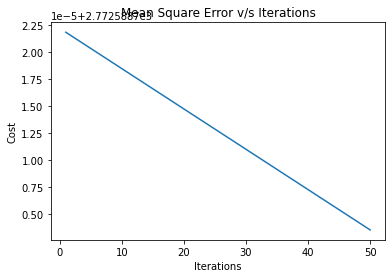

In [17]:
plt.plot(iteration,cost)
plt.title("Mean Square Error v/s Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()